In [ ]:
import pandas as pd
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras import activations
import os

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls "/gdrive/My Drive/Proj2_data/data2"


desc.csv  pics.zip


In [ ]:

lable = pd.read_csv('/gdrive/My Drive/Proj2_data/data2/desc.csv')
lable

,image_id,street,city,n_city,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100
...,...,...,...,...,...,...,...,...
15469,15469,4156 Sterlingview Drive,"Moorpark, CA",227,5,4.1,4092,949000
15470,15470,4355 Avenida Prado,"Thousand Oaks, CA",372,5,3.0,2773,949900
15471,15471,12717 Koenigstein Rd Road,"Santa Paula, CA",338,3,2.0,1576,920000
15472,15472,36 Kunkle Street,"Oak View, CA",253,4,2.0,2086,997000


In [ ]:
!ls "/gdrive/My Drive/proj2"

 pics  'رونوشت pics.zip'


In [ ]:

#!unzip '/gdrive/My Drive/proj2/رونوشت pics.zip' -d '/gdrive/My Drive/proj2'

Streaming output truncated to the last 5000 lines.
  inflating: /gdrive/My Drive/proj2/pics/5499.jpg  
  inflating: /gdrive/My Drive/proj2/pics/55.jpg  
  inflating: /gdrive/My Drive/proj2/pics/550.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5500.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5501.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5502.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5503.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5504.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5505.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5506.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5507.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5508.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5509.jpg  
  inflating: /gdrive/My Drive/proj2/pics/551.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5510.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5511.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5512.jpg  
  inflating: /gdrive/My Drive/proj2/pics/5513.jpg  
  inflating: /gdr

In [ ]:
import os
import cv2
cnt=0
images_path='/gdrive/My Drive/proj2/pics'
X_house_images=np.zeros((15474,64,64,3),dtype='uint32')
for i in range(15474):

    sample=cv2.imread(images_path+'/'+str(i)+'.jpg')
    imgs=cv2.resize(sample,(64,64))
    X_house_images[cnt]=imgs
    cnt+=1

print("No. of images: ",cnt)

No. of images:  15474


In [ ]:
X_house_images = X_house_images / 255.0

In [ ]:
X_house_images[1]

array([[[0.32941176, 0.40784314, 0.63529412],
        [0.34509804, 0.41960784, 0.63137255],
        [0.34901961, 0.43137255, 0.63137255],
        ...,
        [0.12156863, 0.13333333, 0.15294118],
        [0.17647059, 0.23137255, 0.30196078],
        [0.12941176, 0.16078431, 0.20392157]],

       [[0.3254902 , 0.40392157, 0.63137255],
        [0.33333333, 0.41176471, 0.62745098],
        [0.34117647, 0.42352941, 0.61568627],
        ...,
        [0.1254902 , 0.17254902, 0.18823529],
        [0.29803922, 0.34509804, 0.40784314],
        [0.18823529, 0.22745098, 0.28235294]],

       [[0.32156863, 0.4       , 0.62745098],
        [0.3372549 , 0.41568627, 0.63137255],
        [0.34509804, 0.42745098, 0.61960784],
        ...,
        [0.0627451 , 0.13333333, 0.15686275],
        [0.10196078, 0.14117647, 0.19607843],
        [0.16470588, 0.21960784, 0.28627451]],

       ...,

       [[0.48627451, 0.44705882, 0.43137255],
        [0.45098039, 0.43921569, 0.41960784],
        [0.31372549, 0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


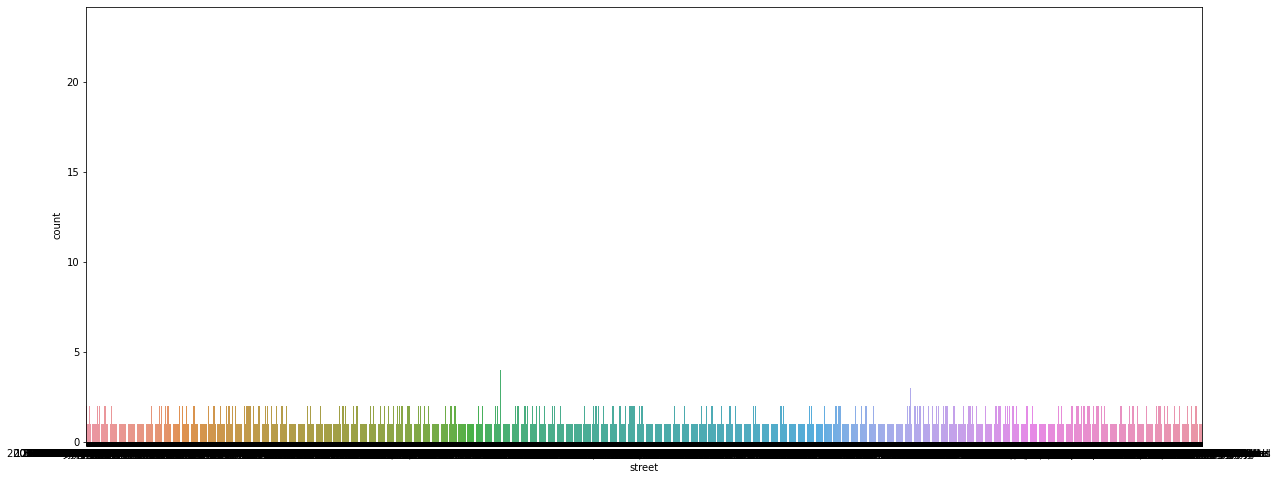

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,8))

sns.countplot(lable['street'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


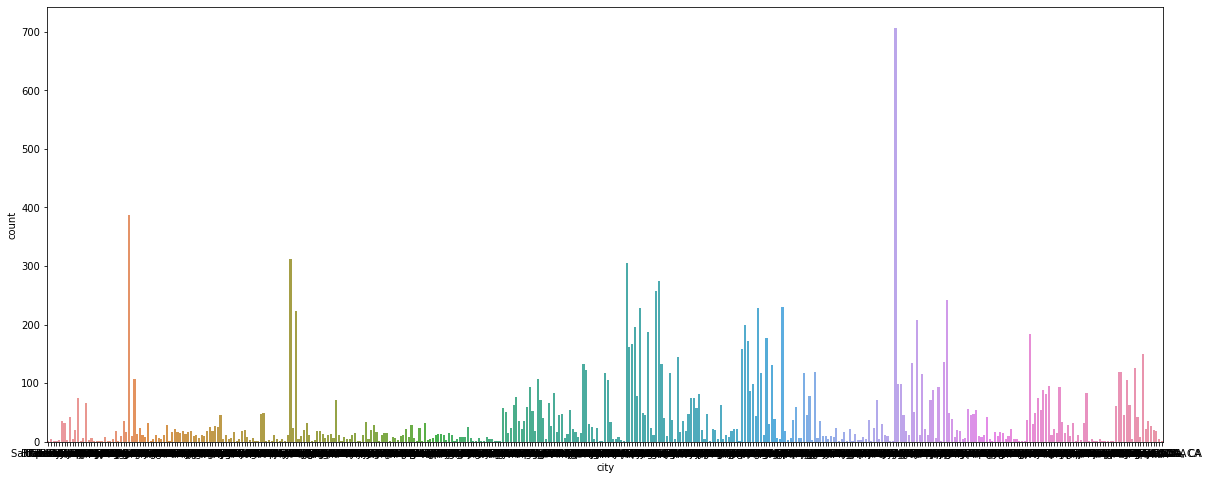

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(lable['city'])

In [ ]:

#categorical_subset = pd.get_dummies(lable['city'])
#categorical_subset.head()

,"29 Palms, CA","Acton, CA","Adelanto, CA","Agoura Hills, CA","Agua Dulce, CA","Aguanga, CA","Alhambra, CA","Aliso Viejo, CA","Alpine, CA","Alta Loma, CA","Altadena, CA","Anaheim Hills, CA","Anaheim, CA","Angelus Oaks, CA","Anza, CA","Apple Valley, CA","Arcadia, CA","Arleta, CA","Arroyo Grande, CA","Artesia, CA","Arvin, CA","Atascadero, CA","Avila Beach, CA","Azusa, CA","Bakersfield, CA","Baldwin Park, CA","Banning, CA","Barstow, CA","Bear Valley Springs, CA","Beaumont, CA","Bell Gardens, CA","Bell, CA","Bellflower, CA","Belltown, CA","Bermuda Dunes, CA","Beverly Hills, CA","Big Bear City, CA","Big Bear Lake, CA","Big Bear, CA","Big River, CA",...,"Topanga, CA","Torrance, CA","Trabuco Canyon, CA","Tujunga, CA","Tustin, CA","Twin Peaks, CA","Upland, CA","Val Verde, CA","Valencia, CA","Valley Center, CA","Valley Glen, CA","Valley Village, CA","Van Nuys, CA","Vandenberg Village, CA","Venice, CA","Ventura, CA","Victorville, CA","View Park, CA","Villa Park, CA","Vista, CA","Walnut, CA","Warner Springs, CA","West Covina, CA","West Hills, CA","West Hollywood, CA","Westchester, CA","Westlake Village, CA","Westminster, CA","Whitewater, CA","Whittier, CA","Wildomar, CA","Wilmington, CA","Winchester, CA","Winnetka, CA","Wofford Heights, CA","Woodland Hills, CA","Wrightwood, CA","Yorba Linda, CA","Yucaipa, CA","Yucca Valley, CA"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
data_dropped = lable.drop(['street', 'city' ], axis=1)
data_dropped['half-bath'] = data_dropped['bath'].apply(lambda x:(x%1)*10)
data_scaled = scaler.fit_transform(data_dropped)
data_scaled = pd.DataFrame(data_scaled, columns=data_dropped.columns.tolist())
y = data_scaled['price']
data_scaled = data_scaled.drop(['price' , 'image_id'], axis=1)
data_scaled.head()


,n_city,bed,bath,sqft,half-bath
0,0.765700,0.181818,0.055556,0.073618,0.0
1,0.115942,0.181818,0.055556,0.024904,0.0
2,0.367150,0.181818,0.027778,0.029907,0.0
3,0.115942,0.181818,0.027778,0.046126,0.0
4,0.132850,0.272727,0.083333,0.130385,0.0


In [ ]:
yy[1]

0.01855955678670361

In [ ]:
yy.shape

(15474,)

In [ ]:
#train = pd.concat([data_scaled, categorical_subset], axis = 1)
#train.head()

,n_city,bed,bath,sqft,"29 Palms, CA","Acton, CA","Adelanto, CA","Agoura Hills, CA","Agua Dulce, CA","Aguanga, CA","Alhambra, CA","Aliso Viejo, CA","Alpine, CA","Alta Loma, CA","Altadena, CA","Anaheim Hills, CA","Anaheim, CA","Angelus Oaks, CA","Anza, CA","Apple Valley, CA","Arcadia, CA","Arleta, CA","Arroyo Grande, CA","Artesia, CA","Arvin, CA","Atascadero, CA","Avila Beach, CA","Azusa, CA","Bakersfield, CA","Baldwin Park, CA","Banning, CA","Barstow, CA","Bear Valley Springs, CA","Beaumont, CA","Bell Gardens, CA","Bell, CA","Bellflower, CA","Belltown, CA","Bermuda Dunes, CA","Beverly Hills, CA",...,"Topanga, CA","Torrance, CA","Trabuco Canyon, CA","Tujunga, CA","Tustin, CA","Twin Peaks, CA","Upland, CA","Val Verde, CA","Valencia, CA","Valley Center, CA","Valley Glen, CA","Valley Village, CA","Van Nuys, CA","Vandenberg Village, CA","Venice, CA","Ventura, CA","Victorville, CA","View Park, CA","Villa Park, CA","Vista, CA","Walnut, CA","Warner Springs, CA","West Covina, CA","West Hills, CA","West Hollywood, CA","Westchester, CA","Westlake Village, CA","Westminster, CA","Whitewater, CA","Whittier, CA","Wildomar, CA","Wilmington, CA","Winchester, CA","Winnetka, CA","Wofford Heights, CA","Woodland Hills, CA","Wrightwood, CA","Yorba Linda, CA","Yucaipa, CA","Yucca Valley, CA"
0,0.765700,0.181818,0.055556,0.073618,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.115942,0.181818,0.055556,0.024904,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.367150,0.181818,0.027778,0.029907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.115942,0.181818,0.027778,0.046126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.132850,0.272727,0.083333,0.130385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, X_images_train , X_images_test , y_train, y_test = train_test_split(data_scaled, X_house_images , y, test_size = 0.2, random_state = 56)
print(X_images_train.shape)
print(X_images_test.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(12379, 64, 64, 3)
(3095, 64, 64, 3)
(12379, 5)
(3095, 5)
(12379,)
(3095,)


In [ ]:
X_train.bath

7903     0.083333
4354     0.055556
5015     0.113889
10924    0.086111
9714     0.083333
           ...   
9451     0.055556
13730    0.055556
3264     0.113889
399      0.083333
2532     0.055556
Name: bath, Length: 12379, dtype: float64

In [ ]:
X_images_train.shape

(12379, 64, 64, 3)

In [ ]:
input_model1 = Input((X_train.shape[1] ),name = 'input1_layer')
input_model2 = Input((X_images_train.shape[1] , X_images_train.shape[2] , X_images_train.shape[3] ),name = 'input2_layer')

#######################################################
#model2 CNN
model2 = Conv2D(32,(4,4), activation='relu',name = 'Conv2_1_5')(input_model2)
model2 = BatchNormalization(name = 'Bnorm2_1')(model2)
model2 = Conv2D(32,(5,5), activation='relu', padding='same',name= 'Conv2_2_5')(model2)
model2 = BatchNormalization(name = 'Bnorm2_2')(model2)
model2 = MaxPooling2D((2, 2),name = 'MaxPool2_1')(model2)
model2 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv2_3_3')(model2)
model2 = BatchNormalization(name = 'Bnorm2_3')(model2)
model2 = MaxPooling2D((2, 2),name = 'MaxPool2_2')(model2)
model2 = Conv2D(64,(2,2), activation='relu' ,padding='valid',name = 'Conv2_4_3')(model2)
model2 = BatchNormalization(name = 'Bnorm2_4')(model2)
model2 = AveragePooling2D((2, 2),name = 'AvgPool2_1')(model2)
model2 = Conv2D(128,(1,1), activation='relu' ,padding='valid',name = 'Conv2_5_1')(model2)
model2 = BatchNormalization(name = 'Bnorm2_5')(model2)
model2 = MaxPooling2D((2, 2),name = 'MaxPool2_3')(model2)
model2 = Flatten(name = 'Flatten2')(model2)
####################################################### 
#model1 NN
model1 = input_model1
####################################################### 
merged = Concatenate()([model1, model2])
# neural network
merged = Dense(units = 256, activation = 'relu')(merged)
merged = Dense(units = 128, activation = 'relu')(merged)
merged = Dropout(rate = 0.2)(merged)
merged = Dense(units = 32, activation = 'relu')(merged)
output = Dense(units = 1, activation = 'sigmoid')(merged)

model = Model(inputs= [input_model1,input_model2], outputs=[output])
model.summary()

Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input2_layer (InputLayer)       [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
Conv2_1_5 (Conv2D)              (None, 61, 61, 32)   1568        input2_layer[0][0]               
__________________________________________________________________________________________________
Bnorm2_1 (BatchNormalization)   (None, 61, 61, 32)   128         Conv2_1_5[0][0]                  
__________________________________________________________________________________________________
Conv2_2_5 (Conv2D)              (None, 61, 61, 32)   25632       Bnorm2_1[0][0]                   
______________________________________________________________________________________

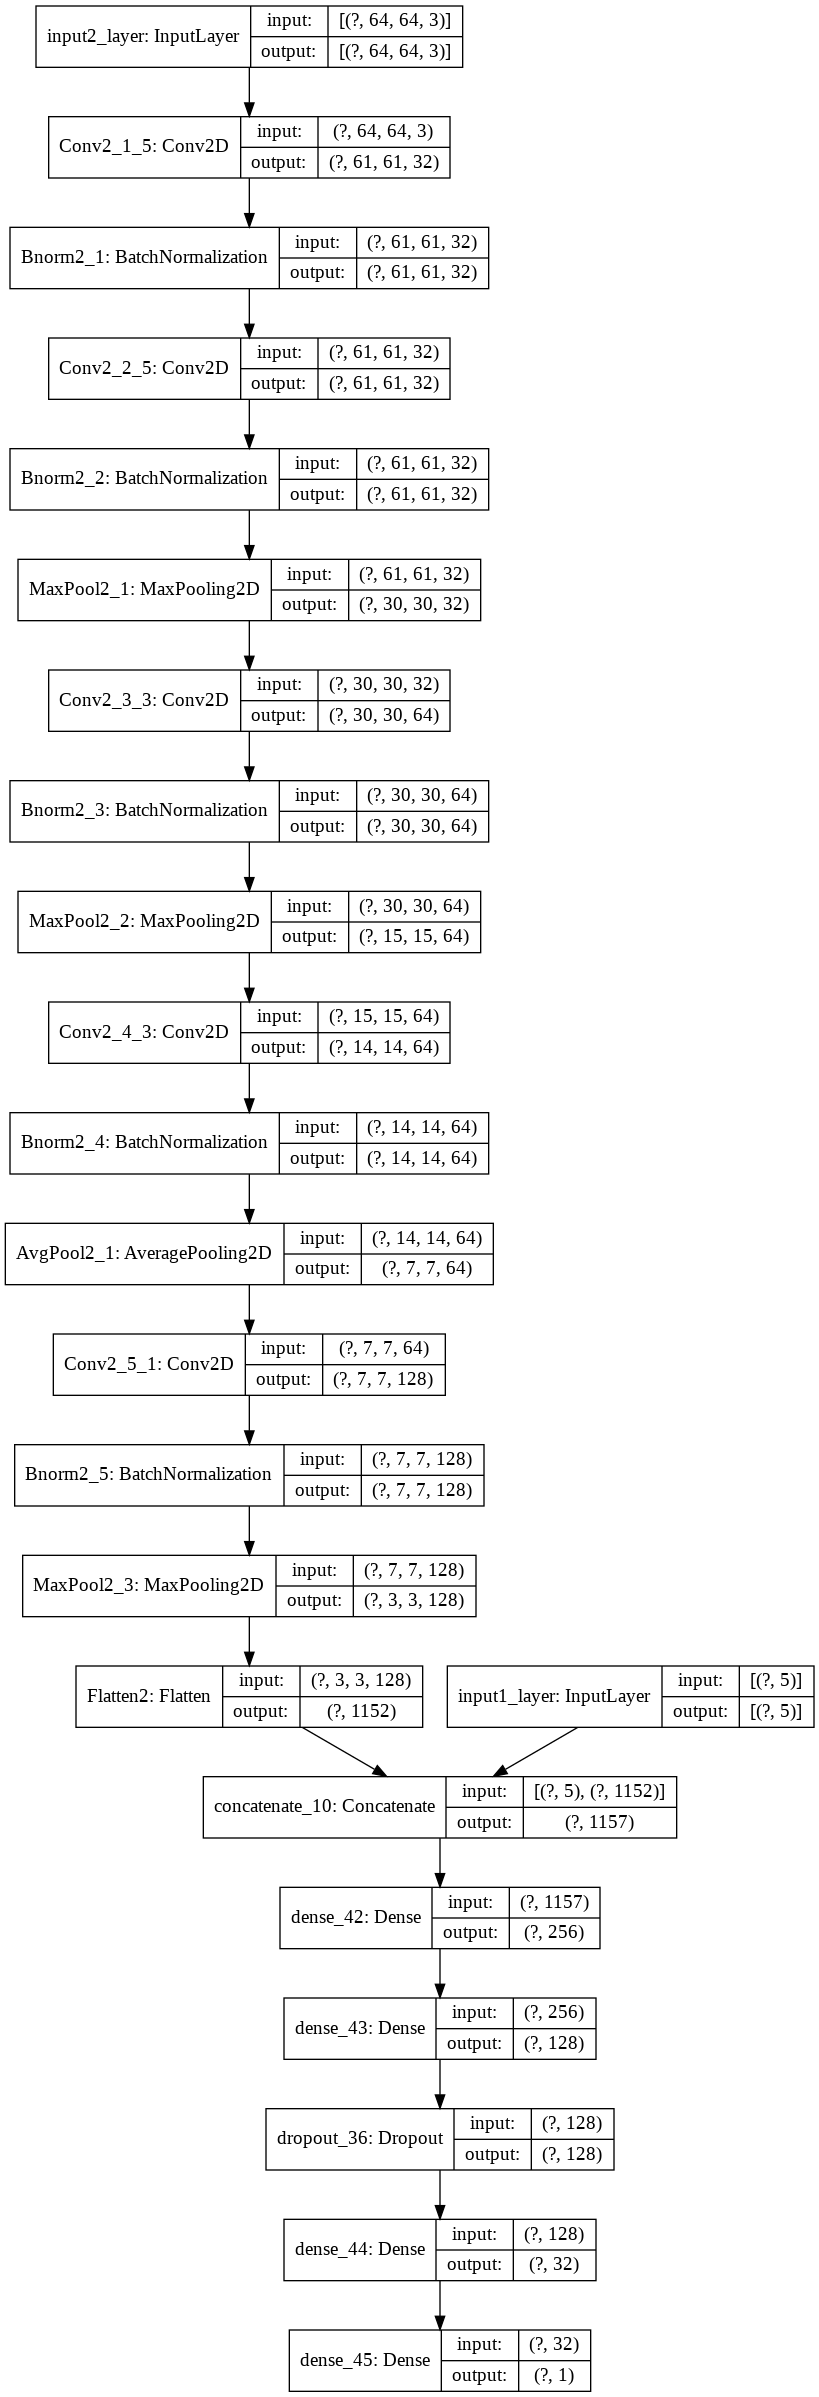

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization , LeakyReLU

input_model2 = Input((X_train.shape[1] ),name = 'input1_layer')
input_model1 = Input((X_images_train.shape[1] , X_images_train.shape[2] , X_images_train.shape[3] ),name = 'input2_layer')

#######################################################
#model1 CNN
model1 = Conv2D(64,(3,3), strides=(2,2) ,name = 'Conv1')(input_model1)
model1 = BatchNormalization( name = 'Bnorm1')(model1)
model1 = LeakyReLU(alpha=0.1)(model1)

model1 = Conv2D(128,(1,1) , name = 'Conv2')(model1)
model1 = Conv2D(128,(1,1) , padding='same',name= 'Conv3')(model1)
model1 = BatchNormalization(name = 'Bnorm2')(model1)
model1 = LeakyReLU(alpha=0.1)(model1)

model1 = Conv2D(256,(3,3), strides=(2,2) ,name = 'Conv4')(model1)
model1 = BatchNormalization(name = 'Bnorm3')(model1)
model1 = LeakyReLU(alpha=0.1)(model1)
model1 = Conv2D(256,(1,1) , padding='same',name= 'Conv5')(model1)
model1 = BatchNormalization(name = 'Bnorm4')(model1)

model1 = Conv2D(256,(1,1) , name = 'Conv6')(model1)
model1 = Conv2D(256,(1,1), padding='same',name= 'Conv7')(model1)
model1 = BatchNormalization(name = 'Bnorm5')(model1)
model1 = LeakyReLU(alpha=0.1)(model1)

model1 = Conv2D(512,(3,3), strides=(2,2) ,name = 'Conv8')(model1)
model1 = BatchNormalization(name = 'Bnorm6')(model1)
model1 = LeakyReLU(alpha=0.1)(model1)
model1 = Conv2D(512,(1,1), padding='same',name= 'Conv9')(model1)
model1 = BatchNormalization(name = 'Bnorm7')(model1)

model1 = Conv2D(1024,(1,1) , name = 'Conv10')(model1)
model1 = Conv2D(1024,(1,1), padding='same',name= 'Conv11')(model1)
model1 = BatchNormalization(name = 'Bnorm8')(model1)
model1 = LeakyReLU(alpha=0.1)(model1)
model1 = Conv2D(2048,(3,3), strides=(2,2) ,name = 'Conv12')(model1)
model1 = BatchNormalization(name = 'Bnorm9')(model1)
model1 = LeakyReLU(alpha=0.1)(model1)
model1 = Conv2D(2048,(1,1)  , padding='same',name= 'Conv13')(model1)
model1 = BatchNormalization(name = 'Bnorm10')(model1)

model1 = Conv2D(2048,(1,1)  , name = 'Conv14')(model1)
model1 = Conv2D(2048,(1,1), padding='same',name= 'Conv15')(model1)
model1 = BatchNormalization(name = 'Bnorm11')(model1)
model1 = LeakyReLU(alpha=0.1)(model1)

model1 = Conv2D(256,(1,1), activation='relu',name = 'Conv16')(model1)
model1 = BatchNormalization(name = 'Bnorm12')(model1)
model1 = LeakyReLU(alpha=0.1)(model1)
model1 = Conv2D(256,(1,1), padding='same',name= 'Conv17')(model1)
model1 = BatchNormalization(name = 'Bnorm13')(model1)
model1 = LeakyReLU(alpha=0.1)(model1)


model1 = AveragePooling2D((1, 1),name = 'AvgPool1')(model1)
model1 = Flatten(name = 'Flatten2')(model1)
#model2 NN
model2 = input_model2
####################################################### 
merged = Concatenate()([model1, model2])
# neural network
merged = Dense(units = 1024, activation = 'relu')(merged)
merged = Dense(units = 512, activation = 'relu')(merged)
merged = Dropout(rate = 0.2)(merged)
merged = Dense(units = 64, activation = 'relu')(merged)
output = Dense(units = 1, activation = 'sigmoid')(merged)

model = Model(inputs= [input_model1,input_model2], outputs=[output])
model.summary()


Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input2_layer (InputLayer)       [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 31, 31, 64)   1792        input2_layer[0][0]               
__________________________________________________________________________________________________
Bnorm1 (BatchNormalization)     (None, 31, 31, 64)   256         Conv1[0][0]                      
__________________________________________________________________________________________________
leaky_re_lu_20 (LeakyReLU)      (None, 31, 31, 64)   0           Bnorm1[0][0]                     
______________________________________________________________________________________

In [ ]:
sgd = SGD(lr=0.01, momentum=0.9)
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1 , patience=3)
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[tensorflow.keras.metrics.MeanSquaredError()])
history = model.fit(x = [X_images_train , X_train], y=y_train ,
                              batch_size = 64,
                              epochs= 50,
                              validation_split = 0.2,
                              verbose=1,
                              callbacks=[es])

Epoch 1/50
155/155 [==============================] - 27s 173ms/step - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 2/50
155/155 [==============================] - 26s 168ms/step - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 3/50
155/155 [==============================] - 24s 156ms/step - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 4/50
155/155 [==============================] - 25s 160ms/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5/50
155/155 [==============================] - 25s 164ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 6/50
155/155 [==============================] - 25s 160ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 7/50

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


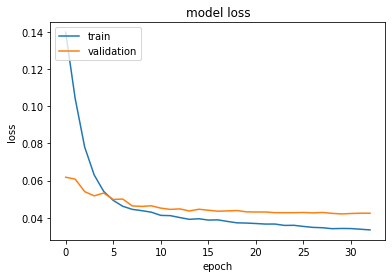

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_test = y_test.reshape(-1,1)

In [ ]:
y_test.shape

(3095, 1)

In [ ]:
y_test_predict = model.predict([X_images_test , X_test])

In [ ]:
y_test.shape

(3095, 1)

In [ ]:
y_test[2]

array([0.28803324])

In [ ]:
y_test_predict[2]

array([0.18524922], dtype=float32)

In [ ]:
print (abs(y_test[1] - y_test_predict[1]))

[0.25294527]


In [ ]:
sum = 0
mid = 0

In [ ]:
for i in range (3095):
    sum = (abs(y_test[i] - y_test_predict[i])) + sum
mid = sum / 3095

In [ ]:
l = lable['price']
print (max(l))


2000000


In [ ]:
print (mid*2000000)

[278481.9461901]


In [ ]:
############################################################################################################################################################

In [ ]:
#just NN
input_layer = Input(shape=X_train.shape[1], name ="input")
hidden_layer1 = Dense(512 ,activation='relu' , name="layer1")(input_layer)
hidden_layer2 = Dense(256 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.2)(hidden_layer2)
output_layer = Dense(1 ,activation='sigmoid' , name="layer3")(droupout_layer)

model = Model(inputs=input_layer, outputs=output_layer , name = "model1")

In [ ]:
import tensorflow
sgd = SGD(lr=0.01, momentum=0.9)
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1 , patience=3)
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[tensorflow.keras.metrics.MeanSquaredError()])
history = model.fit(x = X_train, y=y_train ,
                              batch_size = 128,
                              epochs= 100,
                              validation_split = 0.2,
                              verbose=1,
                              callbacks=[es]
)

Epoch 1/100
78/78 [==============================] - 0s 4ms/step - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 2/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 3/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 4/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 5/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 6/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 7/100
78/78 [===============

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


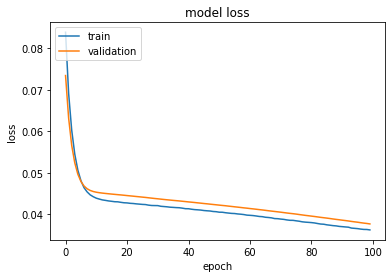

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_test_predict = model.predict(X_test)

In [ ]:
y_test[1]

array([0.55457064])

In [ ]:
y_test_predict[1]

array([0.34314713], dtype=float32)

In [ ]:
sum= 0

In [ ]:
for i in range (3095):
    sum = (abs(y_test[i] - y_test_predict[i])) + sum
mid = sum / 3095

In [ ]:
print (mid*2000000)

[271868.9458102]
